# Global Equities Momentum (GEM)

Gary Antonacci’s Dual Momentum approach is simple: by combining both relative momentum and absolute momentum (i.e. trend following), Dual Momentum seeks to rotate into areas of relative strength while preserving the flexibility to shift entirely to safety assets (e.g. short-term U.S. Treasury bills) during periods of pervasive, negative trends.

Antonacci’s Global Equities Momentum (GEM) portfolio builds a portfolio with three assets: U.S. stocks, international stocks and U.S. bonds. For the retail investor he recommends using low-cost ETFs: for example, VOO for U.S. stocks; VEU for non-U.S. stocks and AGG for U.S. aggregate bonds.  Compare against a global equities benchmark like the ACWI ETF. 

Antonacci named his system “Dual Momentum” because he uses both relative momentum (the measure of the performance of an asset relative to another asset) and absolute momentum ( the measure of performance relative to the risk-free rate – absolute excess return.)  To keep the process very simple to implement, he used a 12-month look-back period and an easy to execute buy and sell system.

Every month the investor places all funds in the equity ETF that has the best 12-month performance relative to the other equity ETFs, unless the absolute performance is worse than the return of six-month U.S. Treasuries (as measured by BIL ETF).  If absolute performance is below the BIL ETF, then the investor places all funds in AGG, the aggregate bond index.

https://www.theemergingmarketsinvestor.com/using-momentum-in-emerging-markets/  
https://blog.thinknewfound.com/2019/01/fragility-case-study-dual-momentum-gem/  
https://seekingalpha.com/article/4010394-prospecting-dual-momentum-gem


![](GEM-rules2.png)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

pd. set_option('display.max_rows', None)

In [14]:
# Set size of inline plots.
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [15]:
symbols = {'US STOCKS' : 'SPY',  'US BONDS' : 'AGG', 'EX-US STOCKS' : 'VEU', 'T-BILL': 'BIL'}

capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()
end = datetime.datetime(2018, 1, 1)

In [16]:
options = {
    'use_adj' : True,
    'use_cache' : True,
    'lookback': 12,
    'margin': 1,
}
options

{'use_adj': True, 'use_cache': True, 'lookback': 12, 'margin': 1}

Run Strategy

In [17]:
s = strategy.Strategy(symbols, capital, start, end, options)
s.run()

View logs

In [18]:
s.rlog.head(100)

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2008-11-03,0,59.68,167,entry,LONG,AGG
1,2009-10-01,1,69.06,167,exit,LONG,AGG
0,2009-10-01,2,26.29,439,entry,LONG,VEU
1,2010-05-03,3,28.11,439,exit,LONG,VEU
0,2010-05-03,4,91.73,134,entry,LONG,SPY
1,2011-02-01,5,101.19,134,exit,LONG,SPY
2,2011-02-01,6,32.15,423,entry,LONG,VEU
3,2011-03-01,7,31.92,423,exit,LONG,VEU
2,2011-03-01,8,101.34,133,entry,LONG,SPY
3,2011-04-01,9,103.50,133,exit,LONG,SPY


In [19]:
s.tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
3,2016-02-01,86.10,2016-04-01,87.66,1.55,332.12,214,8841.01,LONG,AGG
7,2016-04-01,178.35,2016-05-02,179.25,0.91,95.03,105,8936.04,LONG,SPY
4,2016-05-02,87.90,2016-06-01,87.92,0.02,4.76,215,8940.80,LONG,AGG
8,2016-06-01,181.23,2017-06-01,214.09,32.85,3416.71,104,12357.51,LONG,SPY
5,2017-06-01,39.93,2017-12-29,44.22,4.29,2398.77,559,14756.28,LONG,VEU


In [20]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2017-12-22,24598.17,24598.17,24598.17,559,36.16,1.00,-
2017-12-26,24602.69,24602.69,24602.69,559,36.16,1.00,-
2017-12-27,24656.89,24656.89,24656.89,559,36.16,1.00,-
2017-12-28,24724.66,24724.66,24724.66,559,36.16,1.00,-
2017-12-29,24756.28,24756.28,24756.28,0,24756.28,1.00,X


Generate strategy stats - display all available stats

In [21]:
pf.print_full(s.stats)

start                                                  2008-10-30
end                                                    2017-12-29
beginning_balance                                           10000
ending_balance                                           24756.28
total_net_profit                                         14756.28
gross_profit                                             17559.68
gross_loss                                               -2803.39
profit_factor                                                6.26
return_on_initial_capital                                  147.56
annual_return_rate                                          10.40
trading_period                           9 years 1 months 29 days
pct_time_in_market                                          99.91
margin                                                          1
avg_leverage                                                 1.00
max_leverage                                                 1.00
min_levera

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [22]:
benchmark = pf.Benchmark('ACWI', s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

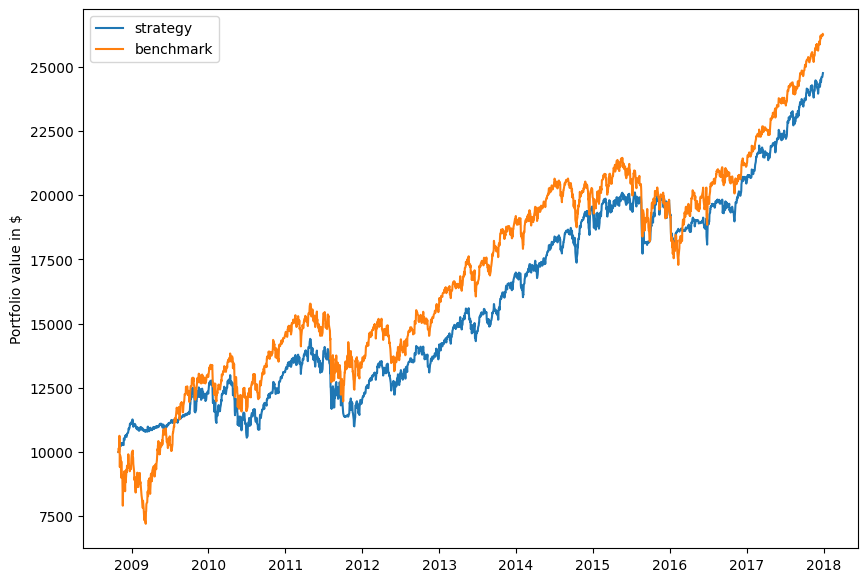

In [23]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,10.40,11.11
max_closed_out_drawdown,-23.66,-32.23
annualized_return_over_max_drawdown,0.44,0.34
best_month,10.26,25.82
worst_month,-16.27,-21.49
sharpe_ratio,0.76,0.63
sortino_ratio,0.96,0.79
monthly_std,3.42,4.55
annual_std,9.28,13.50


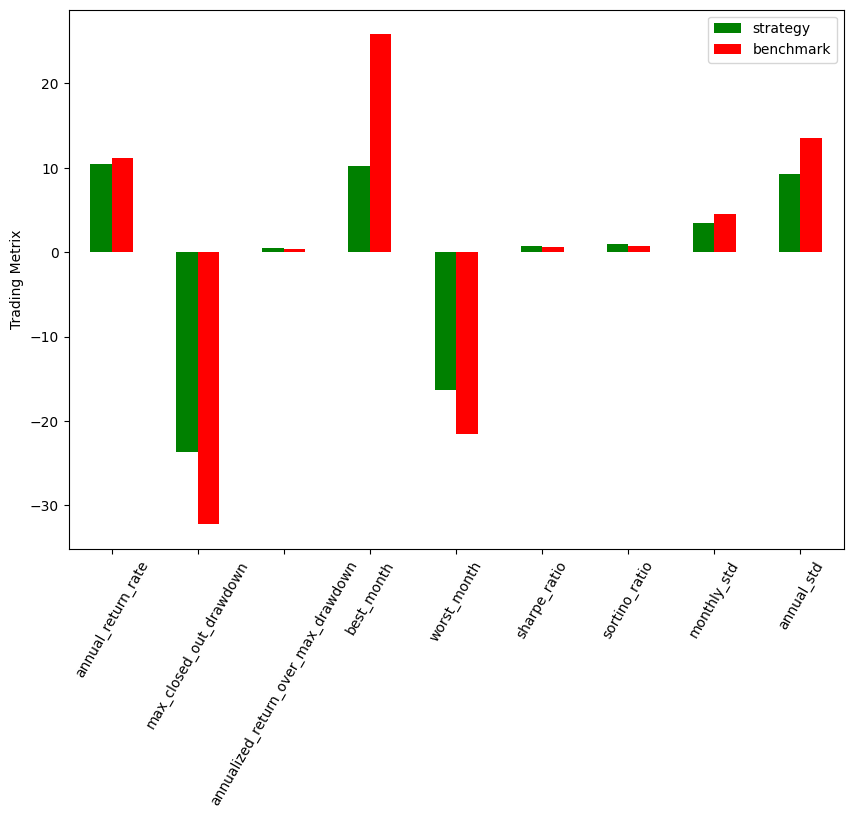

In [24]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df